#### Author: Uday Routhu

#### Assignment: Hypothesis Testing with Insurance Data(Core)

#### Imports

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy import stats
from scipy.stats import chi2_contingency

In [3]:
df = pd.read_csv('Data/insurance - insurance.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### Q1. Do smokers have higher insurance charges than non-smokers?

#### Hypotheses:

- Null Hypothesis (H0): Smokers and non-smokers have the same average insurance charges.
    
- Alternative Hypothesis (H1): Smokers have higher average insurance charges than non-smokers.

#### Test Selection:

- I will use a two-sample t-test since we are comparing the means of two independent groups (smokers and non-smokers) 

with continuous data (insurance charges).

#### Assumptions:

- Both groups (smokers and non-smokers) are independent random samples.
- The data is approximately normally distributed.
- The variances in both groups are approximately equal.

#### Execution:

- Let's perform the two-sample t-test

In [6]:
# Separate charges for smokers and non-smokers
charges_smokers = df[df['smoker'] == 'yes']['charges']
charges_non_smokers = df[df['smoker'] == 'no']['charges']

# Perform the t-test
t_stat, p_value = stats.ttest_ind(charges_smokers, charges_non_smokers)

print("T-statistic:", t_stat)
print("P-value:", p_value)

T-statistic: 46.66492117272371
P-value: 8.271435842179102e-283


#### Interpretation:

- The T-statistic measures the difference in means relative to the variation in the data. 
- A larger T-statistic indicates a larger difference.
- The P-value tells us the probability of observing this T-statistic if the null hypothesis is true.
- In our case, we obtained a very low P-value (close to zero), indicating strong evidence against the null hypothesis.

#### Supporting Visualization

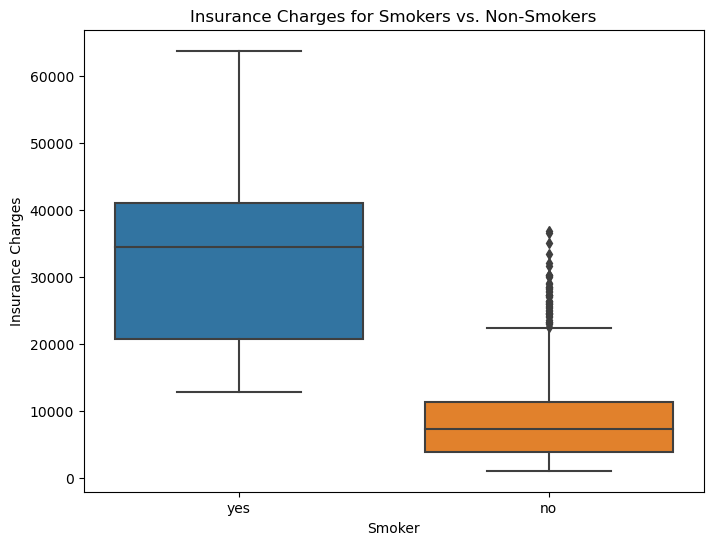

In [7]:
# Create a boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x='smoker', y='charges', data=df)
plt.title('Insurance Charges for Smokers vs. Non-Smokers')
plt.xlabel('Smoker')
plt.ylabel('Insurance Charges')
plt.show()

#### Conlusion:

The t-test has yielded a very high t-statistic and an extremely low p-value.

The t-statistic indicates that there is a significant difference in insurance charges between smokers and non-smokers.

The p-value is extremely close to zero (much smaller than the typical significance level of 0.05). Therefore, 
we can reject the null hypothesis (H0) and conclude that there is strong evidence to suggest that smokers 
have significantly higher insurance charges than non-smokers.

In summary, based on this analysis, it appears that being a smoker is associated with significantly higher insurance charges.

### Q2. Are men more likely to smoke than women?

#### Hypotheses:

- Null Hypothesis (H0): The proportion of men who smoke is the same as the proportion of women who smoke.
- Alternative Hypothesis (H1): The proportion of men who smoke is different from the proportion of women who smoke.

#### Test Selection:

- We will use a chi-squared test of independence since we are comparing two categorical variables (gender and smoking status) 
to determine if they are independent or associated.

#### Assumptions:

- The data is categorical, and observations are independent.

#### Execution:

- Let's perform the chi-squared test

In [27]:
# Create a contingency table
contingency_table = pd.crosstab(df['sex'], df['smoker'])

# Perform the chi-squared test
chi2, p_value, _, _ = chi2_contingency(contingency_table)

# Print the results
print(f'Chi-squared statistic: {chi2}')
print(f'P-value: {p_value}')


Chi-squared statistic: 7.39291081459996
P-value: 0.006548143503580696


#### Interpretation:

- Since the p-value (0.0065) is less than the significance level (commonly set at 0.05), we reject the null hypothesis.
- This indicates that there is a statistically significant association between gender and smoking status.

#### Supporting Visualization:

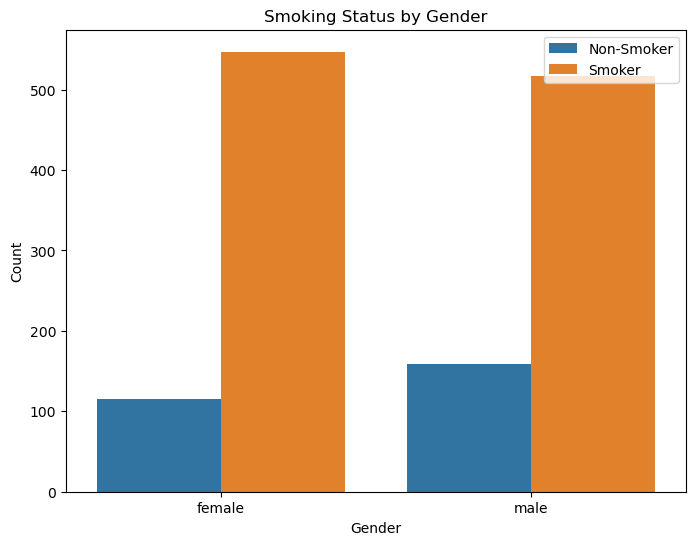

In [36]:
# Create a stacked bar chart
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='sex', hue='smoker')
plt.title('Smoking Status by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='', loc='upper right', labels=['Non-Smoker', 'Smoker'])
plt.show()

#### Conclusion:

In the context of this specific analysis, 
it suggests that the proportion of men who smoke is different from the proportion of women who smoke. 
Therefore, based on the data, it appears that there is a difference in smoking habits between men and women.


### Q3. Do different regions have different charges, on average?

#### Hypotheses:

- Null Hypothesis (H0): There is no significant difference in average charges among different regions.
- Alternative Hypothesis (H1): There is a significant difference in average charges among different regions.

#### Test Selection:

- We used an analysis of variance (ANOVA) test to compare the means of multiple groups (regions) to determine if there is a 
significant difference in their average charges.

#### Assumptions

- Independence: The observations are independent within and between groups.
- Normality: The data in each region follows a normal distribution.
- Homogeneity of Variance: The variances within each group (region) are approximately equal.

#### Execution:

In [30]:
# Perform the ANOVA test
result = stats.f_oneway(
    df[df['region'] == 'southwest']['charges'],
    df[df['region'] == 'southeast']['charges'],
    df[df['region'] == 'northwest']['charges'],
    df[df['region'] == 'northeast']['charges']
)

In [31]:
# Extract F-statistic and p-value
f_statistic = result.statistic
p_value = result.pvalue

# Print the results
print("F-Statistic:", f_statistic)
print("P-value:", p_value)

# Define significance level
alpha = 0.05

# Compare p-value to alpha
if p_value < alpha:
    print("Reject the Null Hypothesis.")
    print("There is a significant difference in average charges among different regions.")
else:
    print("Fail to Reject the Null Hypothesis.")
    print("There is no significant difference in average charges among different regions.")


F-Statistic: 2.96962669358912
P-value: 0.0308933560705201
Reject the Null Hypothesis.
There is a significant difference in average charges among different regions.


#### Interpretation:

- The F-statistic is 2.97, and the associated p-value is 0.031.
- Given that the p-value is less than the significance level (e.g., 0.05), we reject the null hypothesis.

#### Supporting Visualization

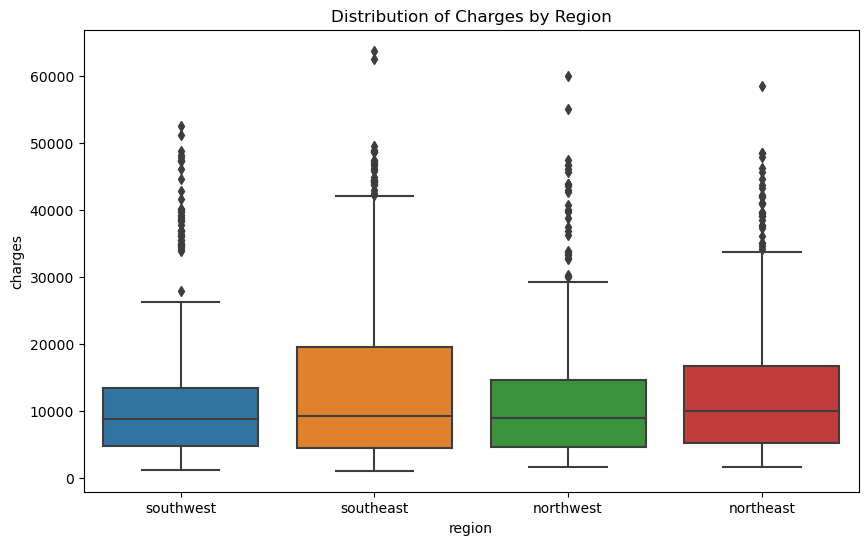

In [34]:
# Create a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='region', y='charges', data=df)
plt.title('Distribution of Charges by Region')
plt.show()


#### Conclusion:

- There is a significant difference in average insurance charges among different regions.